In [1]:
def serialanno2annoweight(ipt):
    kypt = [[ipt[0], ipt[1]],
           [ipt[3], ipt[4]],
           [ipt[6], ipt[7]],
           [ipt[9], ipt[10]],
           [ipt[12], ipt[13]],
           [ipt[15], ipt[16]],
           [ipt[18], ipt[19]],
           [ipt[21], ipt[22]],
           [ipt[24], ipt[25]],
           [ipt[27], ipt[28]],
           [ipt[30], ipt[31]],
           [ipt[33], ipt[34]],
           [ipt[36], ipt[37]],
           [ipt[39], ipt[40]],
           [ipt[42], ipt[43]],
           [ipt[45], ipt[46]],
           [ipt[48], ipt[49]]]
    wght = [ipt[2], ipt[5], ipt[8], ipt[11], ipt[14], ipt[17], ipt[20], ipt[23], ipt[26], ipt[29], ipt[32], ipt[35], ipt[38], ipt[41], ipt[44], ipt[47], ipt[50]]
    return kypt, wght

In [2]:
from pycocotools.coco import COCO
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
import cv2

In [3]:
with open('PATH.json','r') as f:
    pth = json.load(f)

In [4]:
pth

{'ROOT': '/home/kylrzhou/Datasets/HumanPoseEstimation/',
 'ValAnn': 'annotations/person_keypoints_val2017.json',
 'ValImg': 'val2017/',
 'TrainAnn': 'annotations/person_keypoints_train2017.json',
 'TrainImg': 'train2017/'}

In [5]:
ann_pth = os.path.join(pth['ROOT'], pth['ValAnn'])
img_pth = os.path.join(pth['ROOT'], pth['ValImg'])
print(ann_pth,'\n',img_pth)

/home/kylrzhou/Datasets/HumanPoseEstimation/annotations/person_keypoints_val2017.json 
 /home/kylrzhou/Datasets/HumanPoseEstimation/val2017/


1. load coco api (pycocotools) and other library
2. load path file or load path string
3. load anntation path into COCO api
4. get all the ann id
5. load all the anntation by id

In [6]:
coco = COCO(ann_pth)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [7]:
ann_ids = coco.getAnnIds(catIds=1)

In [8]:
anno = coco.loadAnns(ann_ids)

In [9]:
info = ''
for idx, i in enumerate(anno):
    if idx == 0:
        info = i
        print(info)
        break
    continue

{'segmentation': [[125.12, 539.69, 140.94, 522.43, 100.67, 496.54, 84.85, 469.21, 73.35, 450.52, 104.99, 342.65, 168.27, 290.88, 179.78, 288, 189.84, 286.56, 191.28, 260.67, 202.79, 240.54, 221.48, 237.66, 248.81, 243.42, 257.44, 256.36, 253.12, 262.11, 253.12, 275.06, 299.15, 233.35, 329.35, 207.46, 355.24, 206.02, 363.87, 206.02, 365.3, 210.34, 373.93, 221.84, 363.87, 226.16, 363.87, 237.66, 350.92, 237.66, 332.22, 234.79, 314.97, 249.17, 271.82, 313.89, 253.12, 326.83, 227.24, 352.72, 214.29, 357.03, 212.85, 372.85, 208.54, 395.87, 228.67, 414.56, 245.93, 421.75, 266.07, 424.63, 276.13, 437.57, 266.07, 450.52, 284.76, 464.9, 286.2, 479.28, 291.96, 489.35, 310.65, 512.36, 284.76, 549.75, 244.49, 522.43, 215.73, 546.88, 199.91, 558.38, 204.22, 565.57, 189.84, 568.45, 184.09, 575.64, 172.58, 578.52, 145.26, 567.01, 117.93, 551.19, 133.75, 532.49]], 'num_keypoints': 10, 'area': 47803.27955, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 309, 1, 177, 320, 2

In [10]:
img = coco.loadImgs(info['image_id'])

In [11]:
img

[{'license': 1,
  'file_name': '000000425226.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000425226.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-14 21:48:51',
  'flickr_url': 'http://farm5.staticflickr.com/4055/4546463824_bc40e0752b_z.jpg',
  'id': 425226}]

In [12]:
img = os.path.join(img_pth, img[0]['file_name'])

In [13]:
img = Image.open(img)

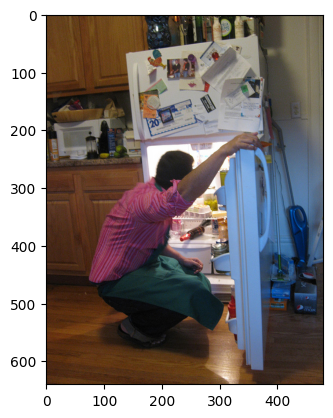

In [14]:
plt.imshow(img)
plt.show()

In [15]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [16]:
transforms = A.Compose([A.RandomBrightnessContrast(p = 0.5), 
                        A.SafeRotate(interpolation = cv2.INTER_LINEAR, border_mode = cv2.BORDER_CONSTANT, value = 0, p = 0.5)
                       ], keypoint_params=A.KeypointParams(format='xy'))

In [17]:
kypt, wght = serialanno2annoweight(info['keypoints'])

In [18]:
print(kypt)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [142, 309], [177, 320], [191, 398], [237, 317], [233, 426], [306, 233], [92, 452], [123, 468], [0, 0], [251, 469], [0, 0], [162, 551]]


In [29]:
transformed = transforms(image = np.array(img, dtype = np.uint8), keypoints = kypt)

In [30]:
type(transformed)

dict

In [31]:
img = transformed['image']
kypt = transformed['keypoints']

In [32]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [33]:
img = Image.fromarray(img)
print(type(img))

<class 'PIL.Image.Image'>


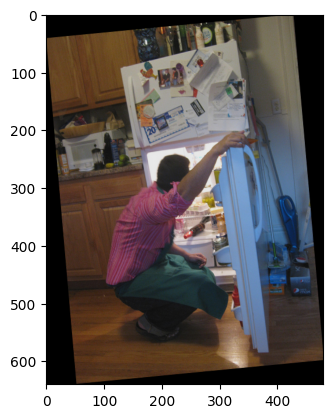

In [34]:
plt.imshow(img)
plt.show()